In [ ]:
#Artificial Neural Network(ANN)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#check availability of GPU
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
temp=df.drop('label',axis=1)
temp

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp.index

RangeIndex(start=0, stop=60000, step=1)

In [ ]:
temp[temp.index==0].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
          0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
        255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
        214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0, 214, 222, 210, 213, 224

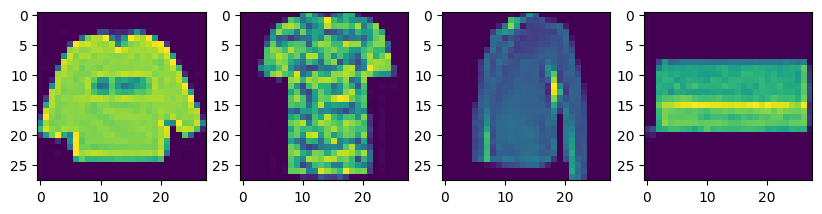

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(temp[temp.index==0].values.reshape(28,28))
plt.subplot(142)
plt.imshow(temp[temp.index==3].values.reshape(28,28))
plt.subplot(143)
plt.imshow(temp[temp.index==88].values.reshape(28,28))
plt.subplot(144)
plt.imshow(temp[temp.index==1000].values.reshape(28,28))

In [ ]:
x=df.drop('label', axis=1).values.astype(float)

In [ ]:
y=df['label'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
y_train

array([5, 7, 8, ..., 9, 4, 0])

In [ ]:
#Normalize the pixel values
x_train/=255.0
x_test/=255.0

In [ ]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [ ]:
xtrain_tensor=torch.tensor(x_train,dtype=torch.float32)
xtest_tensor=torch.tensor(x_test,dtype=torch.float32)
ytrain_tensor=torch.tensor(y_train,dtype=torch.long)
ytest_tensor=torch.tensor(y_test,dtype=torch.long)

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,x,y):
    self.features=x.reshape(-1,1,28,28) #placeholder for batchsize (B,C,H,W)
    self.labels=y
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self,index):
    return self.features[index],self.labels[index]


In [ ]:
train_dataset = CustomDataset(xtrain_tensor, ytrain_tensor)

In [ ]:
test_dataset=CustomDataset(xtest_tensor,ytest_tensor)

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
import torch.nn as nn

In [ ]:
xtest_tensor.shape

torch.Size([12000, 784])

In [ ]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate):

    super().__init__()

    layers = []

    for i in range(num_hidden_layers):

      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x):

    return self.model(x)

In [ ]:
# objective function
def objective(trial):

  # next hyperparameter values from the search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
  epochs = trial.suggest_int("epochs", 10, 100, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
  batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  # model init
  input_dim = 784
  output_dim = 10

  model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
  model.to(device)

  # optimizer selection
  criterion = nn.CrossEntropyLoss()

  if optimizer_name == 'Adam':
    optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  else:
    optimizer=torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  # training loop

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:

      # move data to gpu
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      # forward pass
      outputs = model(batch_features)

      # calculate loss
      loss = criterion(outputs, batch_labels)

      # back pass
      optimizer.zero_grad()
      loss.backward()

      # update grads
      optimizer.step()


  # evaluation
  model.eval()

  # evaluation on test data
  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      # move data to gpu
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      outputs = model(batch_features)

      _, predicted = torch.max(outputs, 1)

      total = total + batch_labels.shape[0]

      correct = correct + (predicted == batch_labels).sum().item()

    accuracy = correct/total

  return accuracy

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.8 MB/s eta 0:00:00


In [ ]:
import optuna
study=optuna.create_study(direction='maximize')

[I 2025-03-29 18:03:06,707] A new study created in memory with name: no-name-3fe1ea46-ab25-49bd-a98f-d7109127b9cc


In [ ]:
study.optimize(objective,n_trials=10)

[I 2025-03-29 18:04:17,332] Trial 0 finished with value: 0.843 and parameters: {'num_hidden_layers': 1, 'neurons_per_layer': 40, 'epochs': 10, 'learning_rate': 2.1832774946496968e-05, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.00014236848746554035}. Best is trial 0 with value: 0.843.
[I 2025-03-29 18:05:36,054] Trial 1 finished with value: 0.8441666666666666 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 48, 'epochs': 60, 'learning_rate': 0.00956898457840218, 'dropout_rate': 0.4, 'batch_size': 128, 'optimizer': 'RMSprop', 'weight_decay': 2.0805320478178366e-05}. Best is trial 1 with value: 0.8441666666666666.
[I 2025-03-29 18:06:45,545] Trial 2 finished with value: 0.47058333333333335 and parameters: {'num_hidden_layers': 1, 'neurons_per_layer': 8, 'epochs': 80, 'learning_rate': 1.4645567214144782e-05, 'dropout_rate': 0.5, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 9.490117766705828e-05}. Best is trial 1 with value: 0.844166

In [ ]:
#training data accuracy
total=0
correct=0
with torch.no_grad():
  for train_batch,train_labels in train_loader:
    train_batch,train_labels=train_batch.to(device),train_labels.to(device)
    output=model(train_batch)
    _, predicted=torch.max(output,1)
    total=total+train_labels.shape[0]
    correct=correct + (predicted==train_labels).sum().item()

print(correct/total)

0.9997916666666666


OBSERVATION
Overfitting
